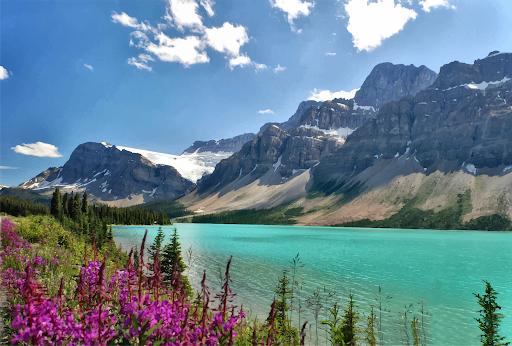

In [18]:
from PIL import Image


def get_bayer_colour(x, y):
    # Should return 'R', 'B', 'G1' or 'G2'
    # Pattern is 
    # R  G1 R  G1 R  G1
    # B2 B  G2 B  G2 B
    # R  G1 R  G1 R G1
    # B2 B  G2 B  G2 B
    # R  G1 R  G1 R G1
    # B2 B  G2 B  G2 B
    return 'R'

original_image = Image.open("landscape.png")
original_image

PNG (512, 346) RGBA
None (512, 346) RGB


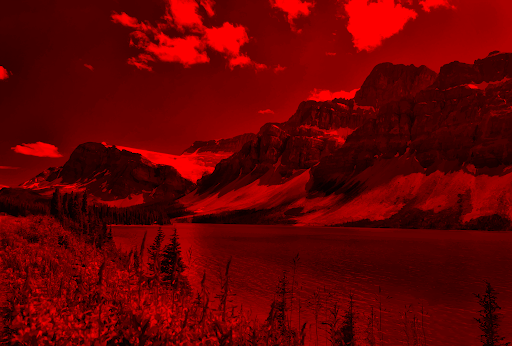

In [19]:

def mosaic(image):
    print(image.format, image.size, image.mode)
    w, h = image.size
    mosaic_image = Image.new('RGB', image.size)
    print(mosaic_image.format, mosaic_image.size, mosaic_image.mode)
    original_pixels = image.load()
    mosaic_pixels = mosaic_image.load()

    for y in range(h):
        for x in range(w):
            r, g, b, a = original_pixels[x, y]
            mosaic_pixels[x, y] = 0,0,0
            bayer_colour = get_bayer_colour(x, y)
            if bayer_colour in ['G1', 'G2']:
                mosaic_pixels[x, y] = 0, g, 0
            elif bayer_colour == 'R':
                mosaic_pixels[x, y] = r, 0, 0
            elif bayer_colour == 'B':
                mosaic_pixels[x, y] = 0, 0, b
    return mosaic_image

mosaic_image = mosaic(original_image)
mosaic_image


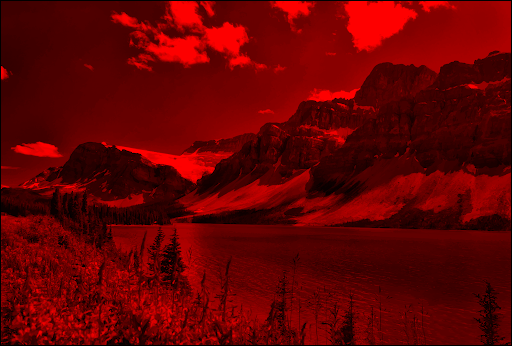

In [20]:

def demosaic(image):
    w, h = image.size
    demosaic_image = Image.new('RGB', image.size)
    mosaic_pixels = image.load()
    demosaic_pixels = demosaic_image.load()

    for y in range(1, h-1):
        for x in range(1, w-1):
            r, g, b = mosaic_pixels[x, y]
            bayer_colour = get_bayer_colour(x, y)
            
            ## Demosiac code goes here...
            # Calculate the values for r, g and b 
            # based on the averages of the neighbouring pixels

            demosaic_pixels[x, y] = r, g, b
    return demosaic_image

demosaiced_image = demosaic(mosaic_image)
demosaiced_image

In [21]:
original_image.show()
mosaic_image.show()
demosaiced_image.show()